<ul>
    <li><a href='#Custom-summarizers'>Custom summarizers</a>
        <ul>
            <li>
                <a href='#simple-summarizer-(based-on-ranking-sentences-depending-on-max-TF-score)'>simple summarizer</a>
            </li>
            <li>
                <a href='#text-rank-(using-sklearn)'>text rank (using sklearn)</a>
            </li>
            <li>
                <a href='#text-rank-(using-pattern)'>text rank (using pattern)</a>
            </li>
            <li>
                <a href='#LSA-(using-sklearn)'>LSA (using sklearn)</a>
            </li>
            <li>
                <a href='#LSA-(using-pattern)'>LSA (using pattern)</a>
            </li>
        </ul>
    </li>
    <li>
        <a href='#Gensim-summarizer'>Gensim summarizer</a>
    </li>
    <li>
        <a href='#Pyteaser-summarizer'>Pyteaser summarizer</a>
    </li>
    <li><a href='#Sumy-summarizers'>Sumy summarizers</a>
        <ul>
            <li>
                <a href='#LuhnSummarizer'>LuhnSummarizer</a>
            </li>
            <li>
                <a href='#EdmundsonSummarizer'>EdmundsonSummarizer</a>
            </li>
            <li>
                <a href='#LsaSummarizer'>LsaSummarizer</a>
            </li>
            <li>
                <a href='#TextRankSummarizer'>TextRankSummarizer</a>
            </li>
            <li>
                <a href='#LexRankSummarizer'>LexRankSummarizer</a>
            </li>
            <li>
                <a href='#SumBasicSummarizer'>SumBasicSummarizer</a>
            </li>
            <li>
                <a href='#KLSummarizer'>KLSummarizer</a>
            </li>
        </ul>
        <li>
            <a href='#Comparison-gensim-summary-with-sumy-summaries'>Comparison gensim summary with sumy summaries</a>
        </li>
        <li>
            <a href='#Comparison-gensim-with-pyteaser'>Comparison gensim with pyteaser</a>
        </li>
    </li>
    <li>
        <a href='#Manual-summarization'>Manual summarization</a>
    </li>
</ul>


In [1]:
def draw(words, scores, x, y):
    import matplotlib.pyplot as plt
    plt.style.use('ggplot')

    fig = plt.figure(figsize=(14,6))
    fig.subplots_adjust(wspace = 0.3)

    ax1 = fig.add_subplot(121)
    plt.yticks(range(len(words)), words)
    ax1.barh(range(len(scores)), scores, align='center', alpha=0.4)
    ax1.set_title('Key Words Frequency')    
    ax1.set_xlabel('Normalized frequency')    

    ax2 = fig.add_subplot(122, sharey=ax1)
    plt.yticks(range(len(words)), words)
    ax2.plot(x, y, "b|", scalex=.1, markersize=10)
    ax2.set_title('Lexical Dispersion Plot')
    ax2.set_xlabel("Word Offset")

    plt.show()
%matplotlib inline

In [2]:
urls = [
    'http://www.reuters.com/article/us-solarcity-m-a-tesla-idUSKCN0Z72WP',
    'http://www.reuters.com/article/us-usa-election-healthcare-ryan-idUSKCN0Z80AQ',
    'http://www.bbc.com/culture/story/20160622-independence-days-sequel-why-wait-20-years',
    'http://www.marketwatch.com/story/dont-look-now-helicopter-money-is-already-being-deployed-2016-06-21',
    'http://www.bloomberg.com/features/2016-enzo-coccia-pizza-school/'
]

## Custom summarizers

In [3]:
import imp

In [4]:
simplesummarizer = imp.load_source('summarizer', '/home/dima/code/summarizer/summarizer/summarizer.py')

In [5]:
simple_summarizer = simplesummarizer.Summarizer()
texts = [simple_summarizer.getContent(url) for url in urls] 
n_sents = 3

#### simple summarizer (based on ranking sentences depending on max TF score)

He is also the CEO of rocket-maker SpaceX.He and Tesla management risk being distracted from rolling out the new Model 3 sedan, a mass-market electric vehicle key to the success of the young firm, analysts said, questioning whether merging two companies which both need substantial cash was a good idea.The audacious entrepreneur envisions a one-stop shop for clean-energy fans, who could buy an electric car, home solar system and battery backup in a single visit.


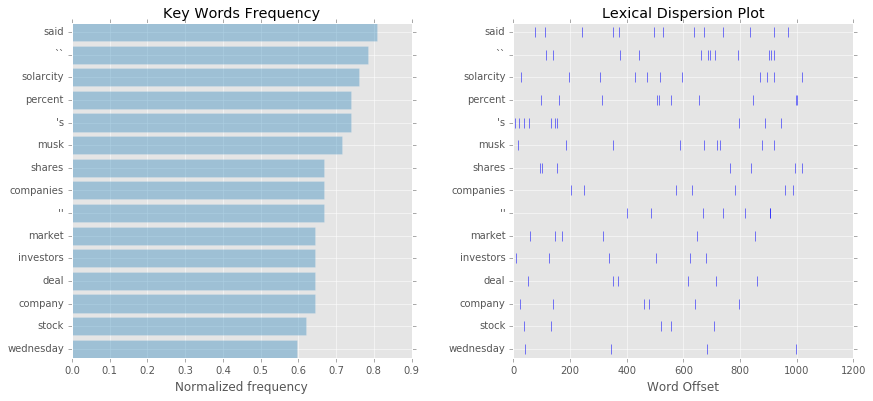



WASHINGTON Republicans in the U.S. House of Representatives unveiled an alternative plan to overhaul the nation's healthcare system on Wednesday, slamming Obamacare even as they aimed to keep some of its more popular provisions.Their proposal, part of broader effort by House Speaker Paul Ryan to offer a Republican agenda ahead of the Nov. 8 elections, is conservatives' latest bid to "repeal and replace" the 2010 law.Ryan, the country's highest-ranking elected Republican, is offering the proposal as the party seeks to maintain control of both the House and the Senate and take over the White House.


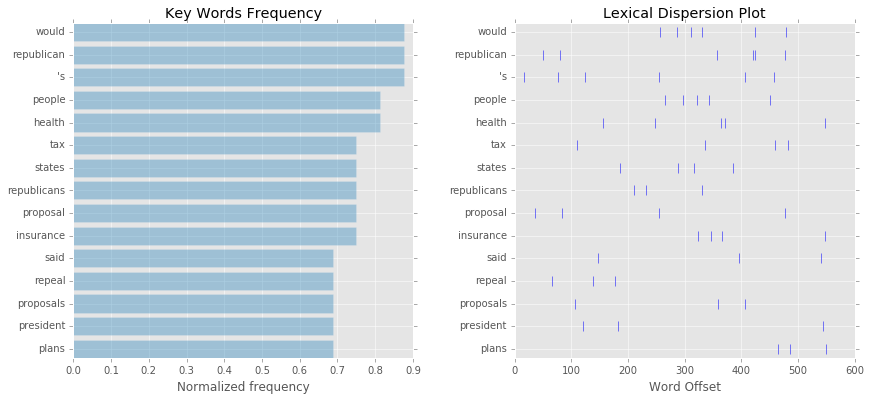

And they waited because Emmerich wanted to tell a different kind of story.The original film showed how an extinction-level threat to all of humanity, such as an invasion of bloodthirsty extra-terrestrials, might cause people to put aside their national, ethnic, racial and religious differences to work together for survival.


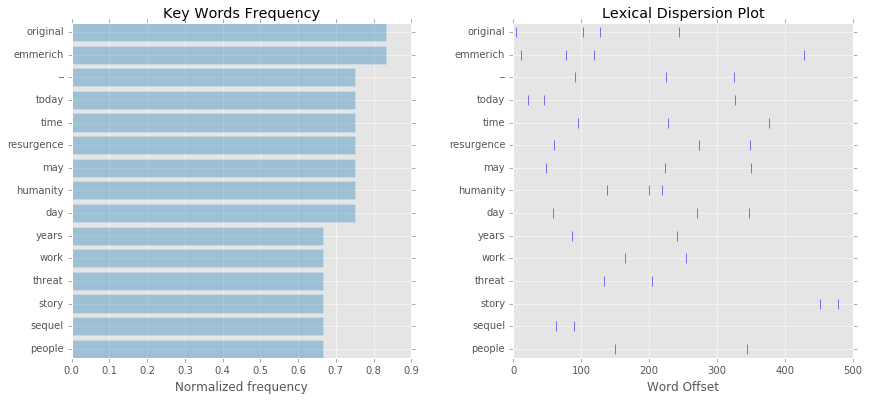


Apparently Federal Reserve Chairwoman Janet Yellen didn’t get the memo but helicopter money is already at work in the U.S. Last week, Yellen conceded that the Fed may have to “legitimately consider” resorting to unconventional measures in the event of a severe economic downturn.


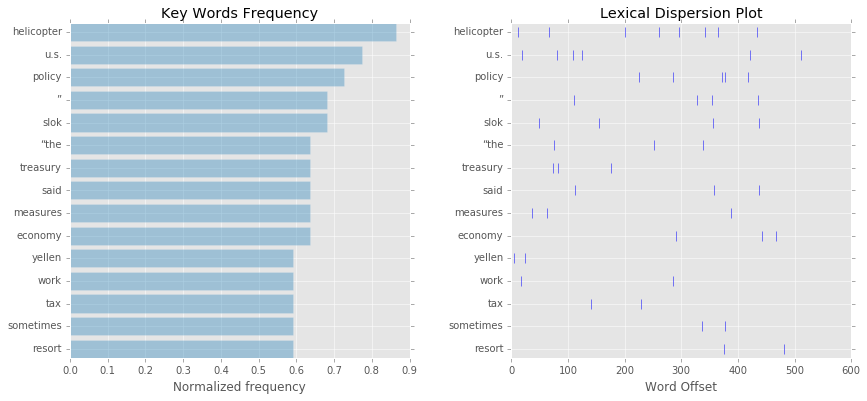

“The yeast is like a living human being—it needs oxygen to breathe.” The next day, after another hectic morning session of dough beating and pizza ball-making, I attend an impromptu historical lecture from Antonio Mattozzi, whose book, Inventing the Pizzeria: A History of Pizza Making in Naples, is the authoritative text on this dense subject.


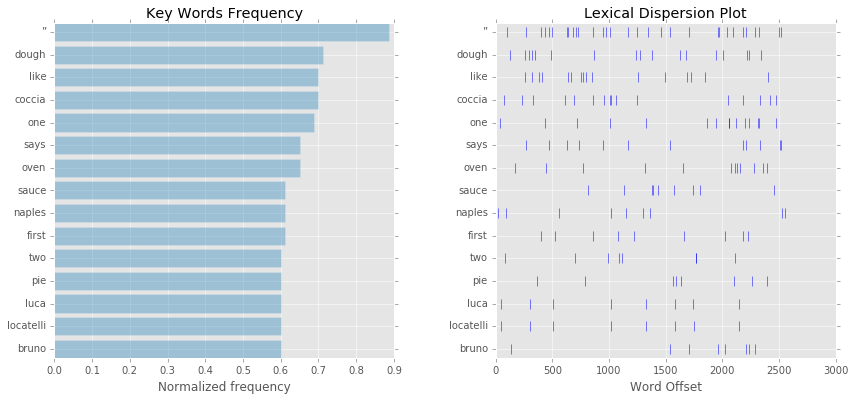

In [7]:
for text in texts:
    print simple_summarizer.summarize(text,n=n_sents)
    words, scores = simple_summarizer.getKeyWords(text)
    x, y = simple_summarizer.getDispersion(text)
    draw(words, scores, x, y)

#### text rank (using sklearn)

In [8]:
textrank_utils = imp.load_source('utils', '/home/dima/code/textrank/utils.py')
textrank = imp.load_source('summarizer', '/home/dima/code/textrank/summarizer.py')

Yeah, there have been discussions." "We should have done it sooner. (Additional reporting by Jennifer Ablan, Supantha Mukherjee, Narottam Medhora,Liana Baker, Paul Lienert, Michael Flaherty, Alexandria Sage, Tim McLaughlin, Ross Kerber, Rishika Sadam, Nichola Groom and Noel Randewich; Writing by Peter Henderson; Editing by Anil D'Silva, Lisa Von Ahn and Bill Rigby)


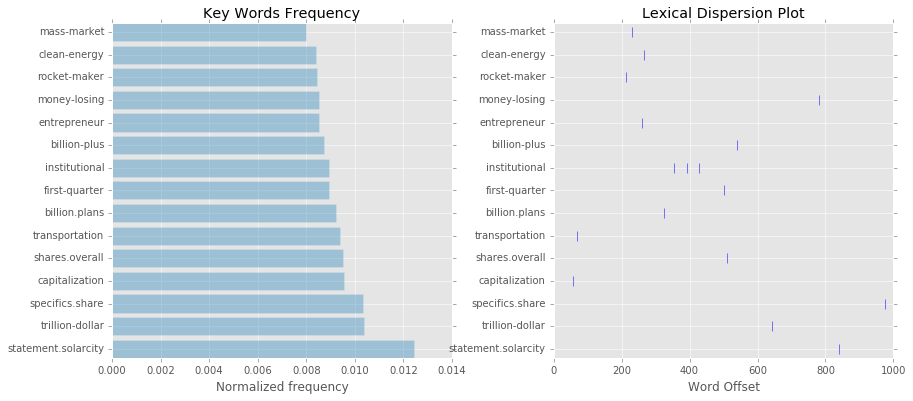

Industry groups struck a bipartisan tone in their reaction ahead of the election, as it remains to be seen who ultimately wins control of Congress and the White House. "We stand ready to work with both parties on market-based solutions that improve access and affordability for consumers," said Marilyn Tavenner, president of America’s Health Insurance Plans. (Reporting by Eric Beech, Caroline Humer and Richard Cowan; Writing by Susan Heavey; Editing by Peter Cooney and Jeffrey Benkoe)


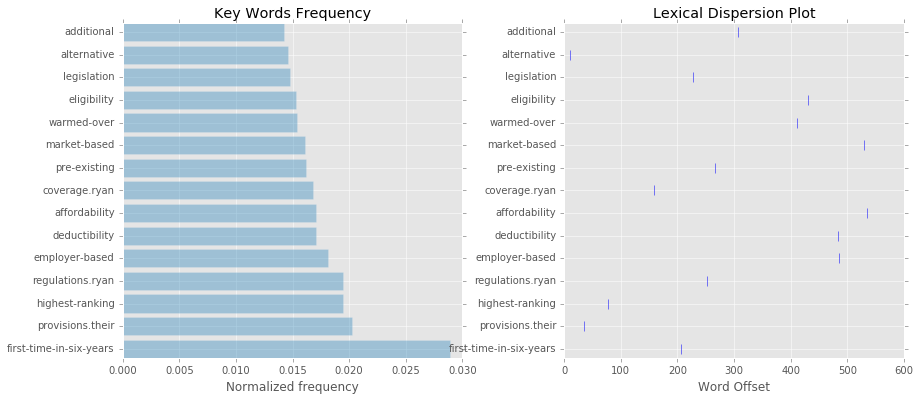

“It always has to be a franchise [today], it has to have a superhero name in front of it. But it was rooted in the real world.Resurgence imagines an alternate reality, in which The War of ’96 caused history to diverge dramatically from our own. In the video above, the BBC’s Peter Bowes visited the set of the new movie in New Mexico to find out and spoke to Emmerich and stars Goldblum, Judd Hirsch, Liam Hemsworth, Vivica A Fox and Maika Monroe.If you would like to comment on this story or anything else you have seen on BBC Culture, head over to our Facebook page or message us on Twitter.And if you liked this story, 


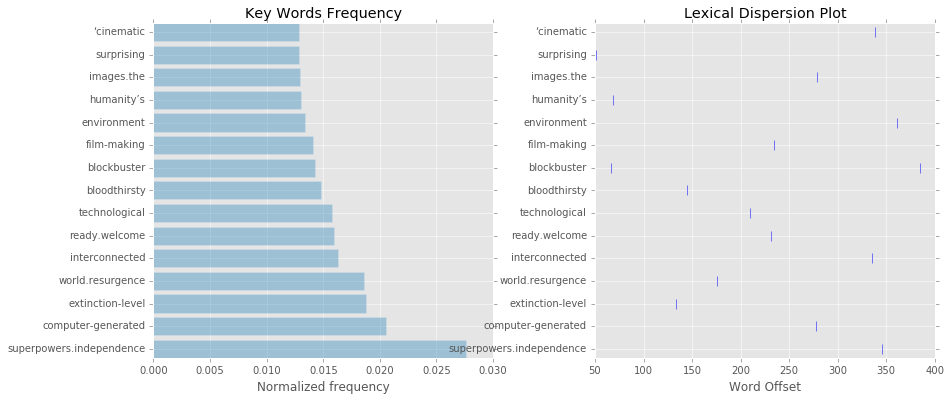

Such payments have been made going back as far as 1917, four years after the Federal Reserve was established. DoubleLine Capital’s Jeffrey Gundlach recently predicted the Fed will have to resort to the helicopters. Economist Nouriel Roubini also has urged central banks to deploy more “unconventional” monetary policies as “desperate times call for desperate measures.” 


                                More from MarketWatch
                            



Related Topics

U.S. Stocks
Markets
NY Stock Exchange
NASDAQ





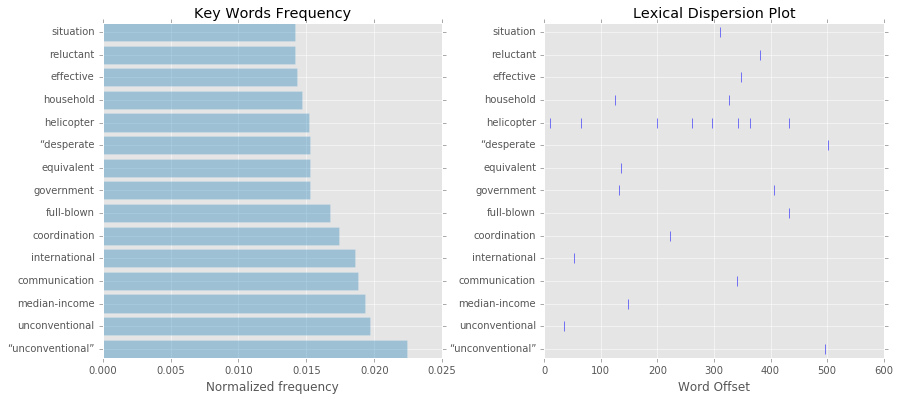

“Don’t worry. You can follow him on Twitter and Instagram at @plattypants. Editor: Emma Rosenblum
 






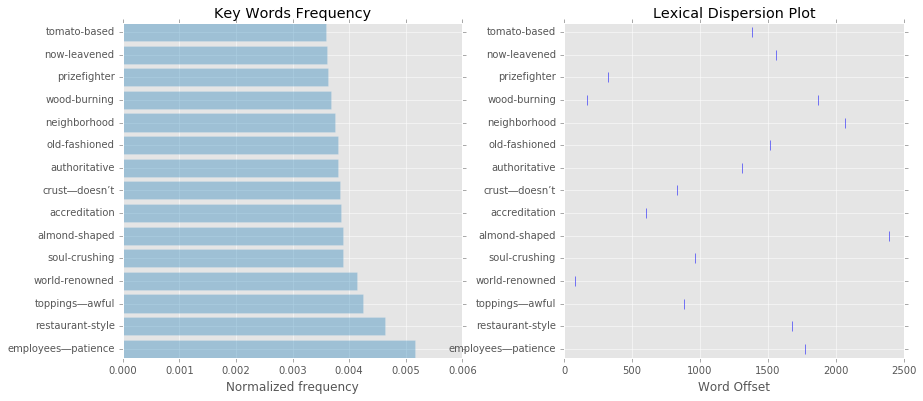

In [9]:
for text in texts:
    print textrank.summarize(text,n=n_sents)
    words, scores = textrank.keywords(text, n=15)
    x, y = textrank.dispersion(text, words)
    words = [w for w in words]                
    draw(words, scores, x, y)

#### text rank (using pattern)

In [10]:
textrank_pattern_utils = imp.load_source('utils', '/home/dima/code/textrank_pattern/utils.py')
textrank_pattern = imp.load_source('summarizer', '/home/dima/code/textrank_pattern/summarizer.py')

Yeah , there have been discussions .Costs for both companies would go down significantly after the merger , he said , without giving specifics.Share lending data suggested short sellers were increasing their bets against both companies .( Additional reporting by Jennifer Ablan , Supantha Mukherjee , Narottam Medhora,Liana Baker , Paul Lienert , Michael Flaherty , Alexandria Sage , Tim McLaughlin , Ross Kerber , Rishika Sadam , Nichola Groom and Noel Randewich ; Writing by Peter Henderson ; Editing by Anil D'Silva , Lisa Von Ahn and Bill Rigby )


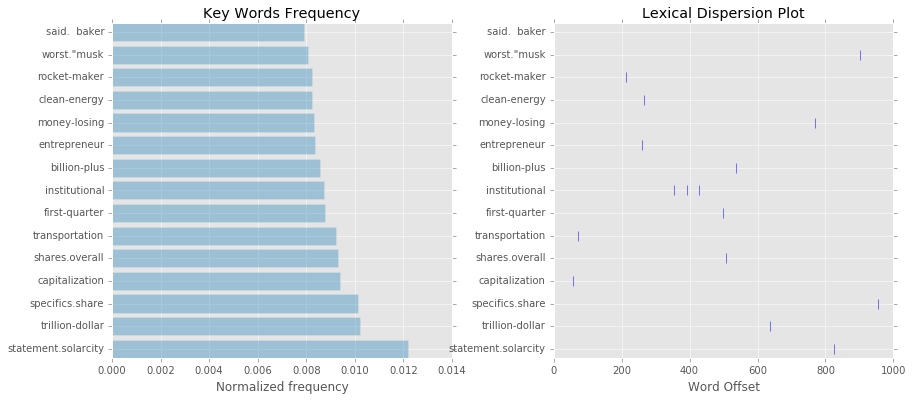

Obama , a Democrat , has said it has helped some 20 million Americans get health care coverage.Ryan acknowledged his agenda was unlikely to displace current law anytime soon .Industry groups struck a bipartisan tone in their reaction ahead of the election , as it remains to be seen who ultimately wins control of Congress and the White House .( Reporting by Eric Beech , Caroline Humer and Richard Cowan ; Writing by Susan Heavey ; Editing by Peter Cooney and Jeffrey Benkoe )


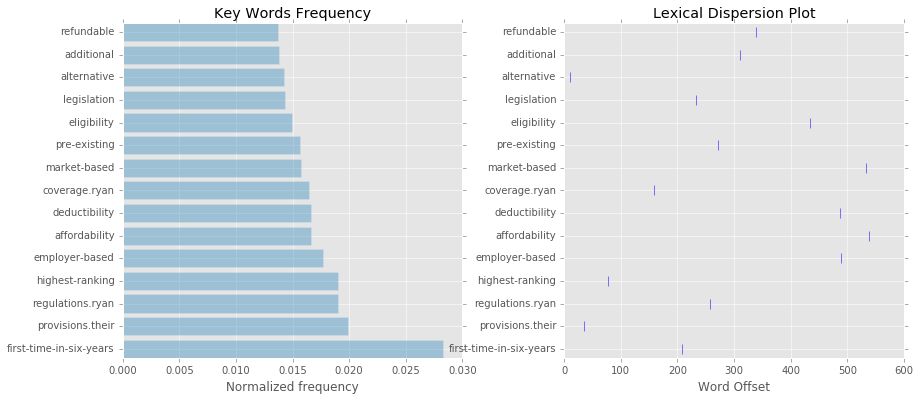

“ It always has to be a franchise [ today ] , it has to have a superhero name in front of it .But it was rooted in the real world.Resurgence imagines an alternate reality , in which The War of ’ 96 caused history to diverge dramatically from our own .That unity of humanity against a shared threat has lasted and resulted in technological advances far surpassing those of our world .


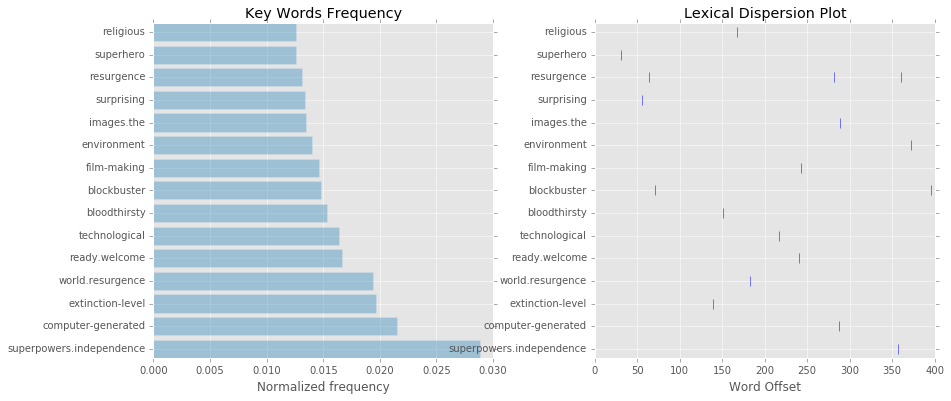

Such payments have been made going back as far as 1917 , four years after the Federal Reserve was established .Related TopicsU.S. Stocks Markets NY Stock Exchange NASDAQ


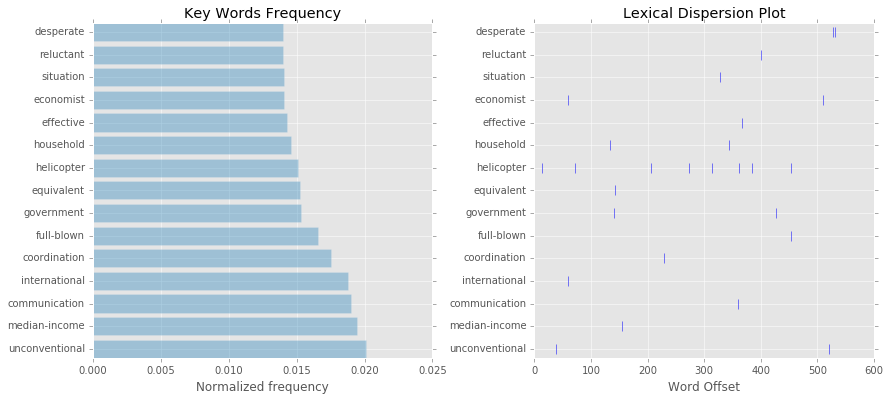

“ It can create a lot of stress . ”“ Today is more humid .What does that mean ? ”


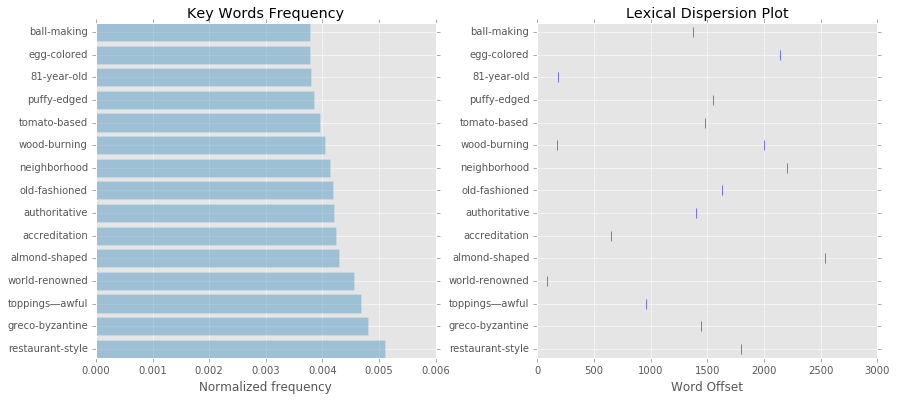

In [11]:
for text in texts:
    print textrank_pattern.summarize(text,n=n_sents)
    words, scores = textrank_pattern.keywords(text, n=15)
    x, y = textrank_pattern.dispersion(text, words)
    words = [w for w in words]                
    draw(words, scores, x, y)

#### LSA (using sklearn)

In [12]:
lsa_utils = imp.load_source('utils', '/home/dima/code/lsa/utils.py')
lsa = imp.load_source('summarizer', '/home/dima/code/lsa/summarizer.py')

He is also the CEO of rocket-maker SpaceX.He and Tesla management risk being distracted from rolling out the new Model 3 sedan, a mass-market electric vehicle key to the success of the young firm, analysts said, questioning whether merging two companies which both need substantial cash was a good idea.The audacious entrepreneur envisions a one-stop shop for clean-energy fans, who could buy an electric car, home solar system and battery backup in a single visit. I also feel like Musk is trying to do too much," said well-known investor Jeffrey Gundlach, chief executive at DoubleLine Capital, which does not hold Tesla shares.Investors who short Tesla, betting that shares will fall, pointed to the conflict of interest and raised financial concerns about uniting two money-losing companies which both regularly raise cash to support their expansion. "When a company's executives misunderstand modern corporate finance and technology strategy, they can make profound miscalculations and errors of

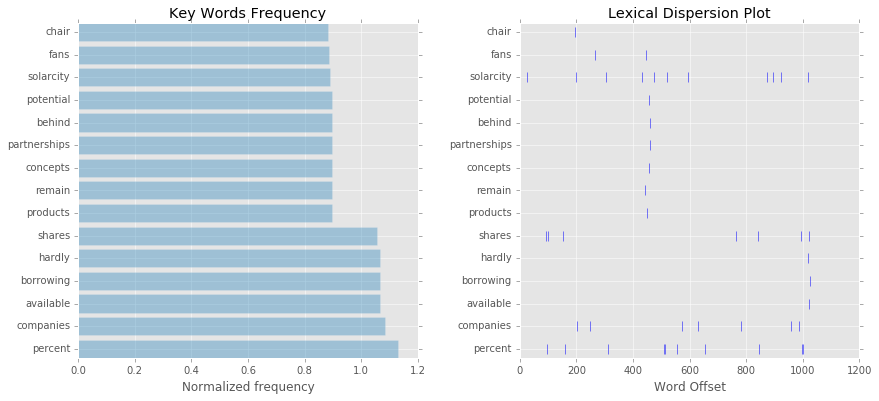

“What we are laying out today is a first-time-in-six-years consensus by the Republicans in the House on what we replace Obamacare with.”
In their plan, which is not formal legislation, House Republicans blasted Obamacare for limiting patients' choices, increasing consumer costs, and burying employers and health care providers under new regulations.Ryan's proposal would keep some popular pieces, including not allowing people with pre-existing conditions to be denied coverage and permitting children to stay on their parents' coverage until age 26.It would also allow states that have already expanded the number of people eligible for Medicaid under the law to maintain the additional coverage, although it would prevent any new states from doing so. Obamacare also provides subsidies for people to buy insurance if they do not qualify for Medicaid.It also includes long-held Republican proposals such as allowing consumers to buy health insurance across state lines, expanding health savings acc

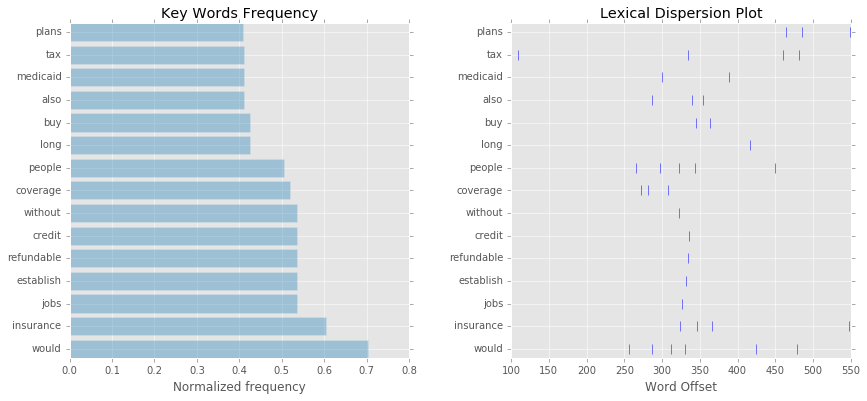

But Emmerich and 20th Century Fox did wait 20 years before releasing a sequel – a staggeringly long time in Hollywood, considering that the original film grossed over $800 million (£272 million) worldwide. Ordinary sequels are no longer good enough – today movie studios try to build long series of interconnected films, or ‘cinematic universes’, usually involving people with superpowers.Independence Day: Resurgence may appear to be the odd film out in such an environment. But it also arrives at a moment when nostalgia for the 1990s, a time when Jeff Goldblum could be a go-to blockbuster leading man, is at an all-time high.Can a film from 1996 reinvent itself for 2016?


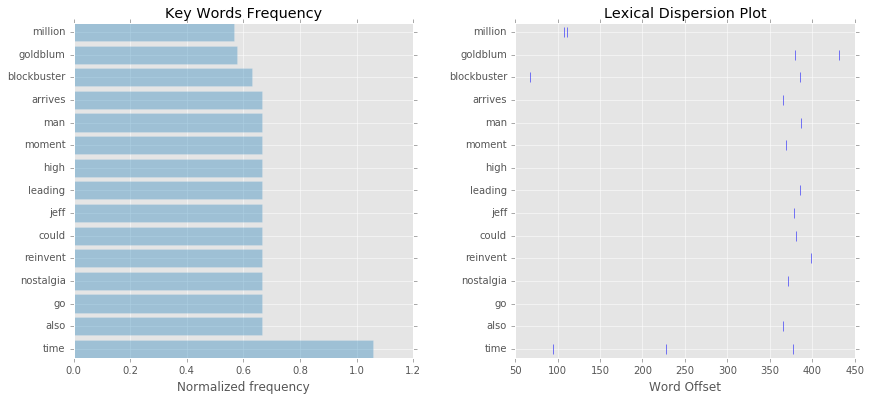


Apparently Federal Reserve Chairwoman Janet Yellen didn’t get the memo but helicopter money is already at work in the U.S. Last week, Yellen conceded that the Fed may have to “legitimately consider” resorting to unconventional measures in the event of a severe economic downturn. “The Fed in 2015 paid the U.S. Treasury $117 billion and dividing that by the total number of households (125 million) shows that the Fed is already giving money to U.S. consumers,” he said in a note on Tuesday. Traditionally, the concept of helicopter money has been viewed as a policy tool of last resort and sometimes policy makers are reluctant to publicly embrace such drastic measures.


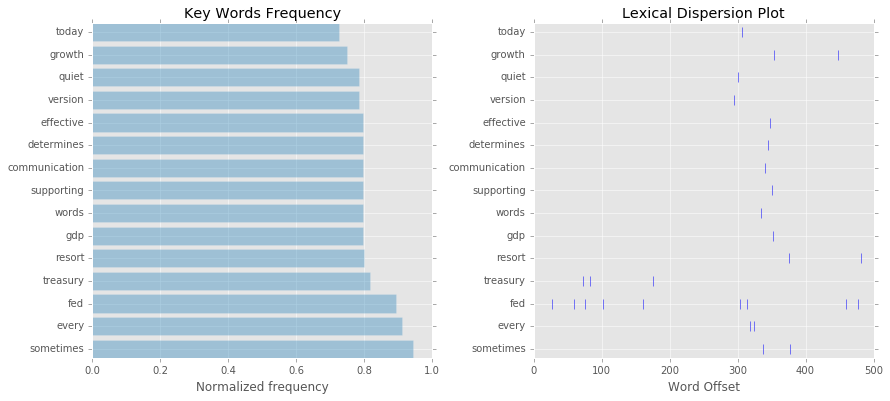

“My students after two weeks are making better pizza!”
            
“Honestly, it’s all hard, and if you make one mistake, you will pay for it all day,” says Matt Resich, a fellow student who’s come to learn how to make pizza the proper Neapolitan way. The earliest record in Naples dates to the late 1700s, when street vendors began selling wheels of baked dough covered in a simple tomato-based sauce to sailors around the harbor—the original word for “marinara” sauce means “from the sea.” During the 1800s, richer, more expensive toppings were added, including smoked mozzarella and fresh basil leaves. Aprea briefs me on how to identify fresh mozzarella by running a finger over its top to check for moisture (“Old mozzarella looks like yogurt; not a good look”) and on the rudimentary way to prep a wood-burning oven—you need one pile of coals to cook the pizza and a lit log to char the crust.


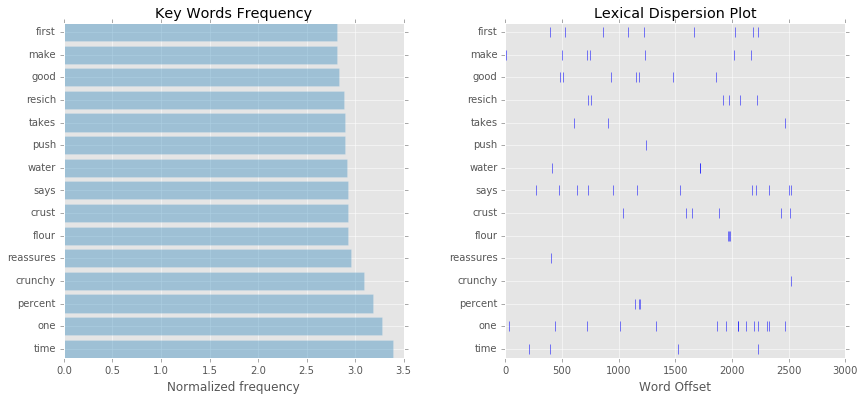

In [13]:
for text in texts:
    print lsa.summarize(text,n=n_sents)
    keywords_ranking = lsa.word_ranking(text).most_common(15)
    words, scores =  list(zip(*keywords_ranking))
    x, y = lsa.dispersion(text, words)
    words = [w for w in words]                
    draw(words, scores, x, y)

#### LSA (using pattern)

In [6]:
lsa_pattern = imp.load_source('summarizer', '/home/dima/code/lsa_pattern/summarizer.py')

Yeah , there have been discussions . Hardly any SolarCity shares were available for borrowing . I also feel like Musk is trying to do too much , " said well-known investor Jeffrey Gundlach , chief executive at DoubleLine Capital , which does not hold Tesla shares.Investors who short Tesla , betting that shares will fall , pointed to the conflict of interest and raised financial concerns about uniting two money-losing companies which both regularly raise cash to support their expansion."When a company 's executives misunderstand modern corporate finance and technology strategy , they can make profound miscalculations and errors of judgment , " Salome Gvaramia , chief operating officer of Devonshire Capital , which has a short position in Tesla , said in a statement.SolarCity shares have fallen more than 50 percent this year in a highly competitive market , fanning criticism that a Tesla deal was meant to save SolarCity.Some analysts noted that SpaceX has bought SolarCity bonds , giving 

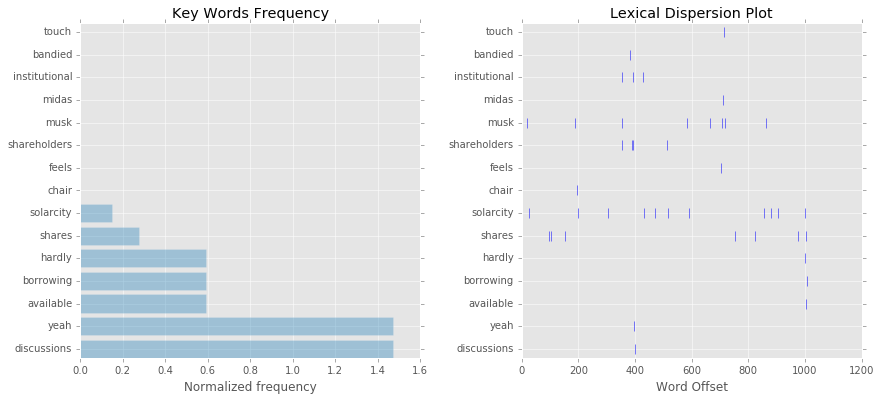

( Reporting by Eric Beech , Caroline Humer and Richard Cowan ; Writing by Susan Heavey ; Editing by Peter Cooney and Jeffrey Benkoe ) “ What we are laying out today is a first-time-in-six-years consensus by the Republicans in the House on what we replace Obamacare with . ” 8 elections , is conservatives ' latest bid to " repeal and replace " the 2010 law.Ryan , the country 's highest-ranking elected Republican , is offering the proposal as the party seeks to maintain control of both the House and the Senate and take over the White House .


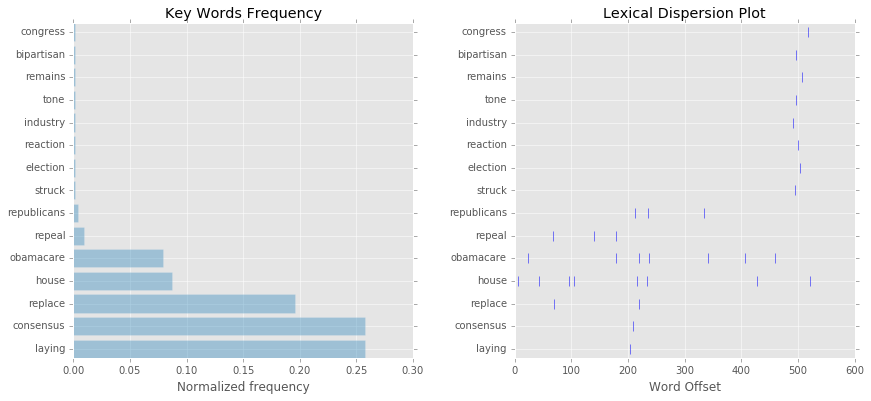

It can be discouraging to make big movies [ today ] . ” “ It always has to be a franchise [ today ] , it has to have a superhero name in front of it . But it was rooted in the real world.Resurgence imagines an alternate reality , in which The War of ’ 96 caused history to diverge dramatically from our own .


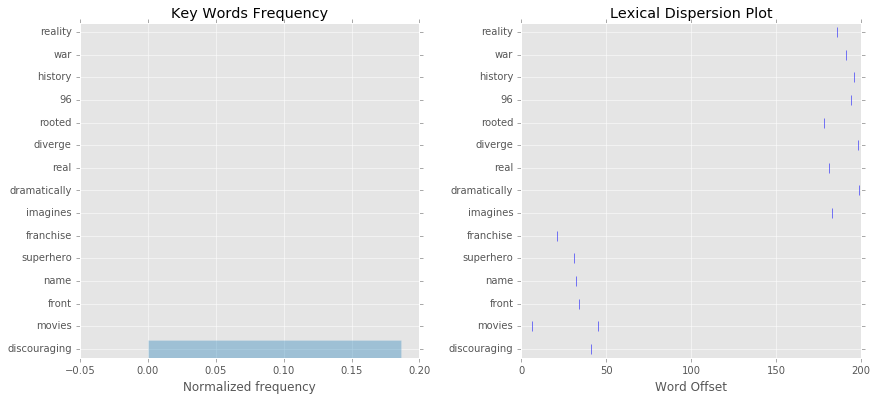

U.S. Stocks Markets NY Stock Exchange NASDAQ More from MarketWatch Related Topics


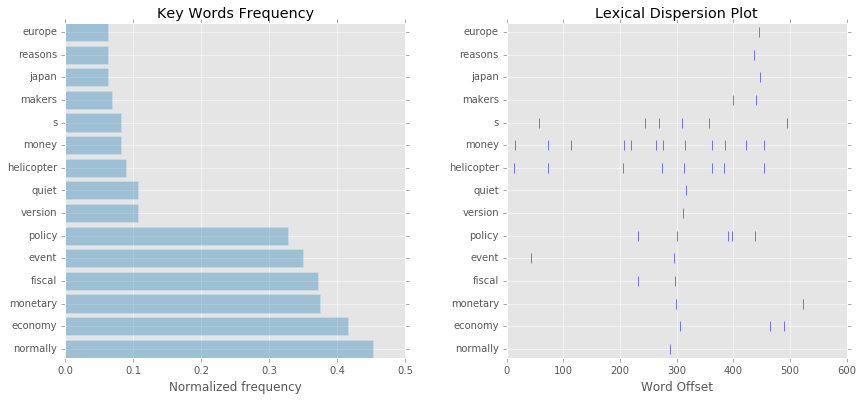

“ Push , Push ! ” What does that mean ? ” I ’ m attempting , after slamming at the dough like a wheezing prizefighter , to master what Coccia likes to call “ the delicate dance ” of proper Neapolitan pizza making , which includes shaping fresh dough into little panetti balls , as smooth and round as plums .


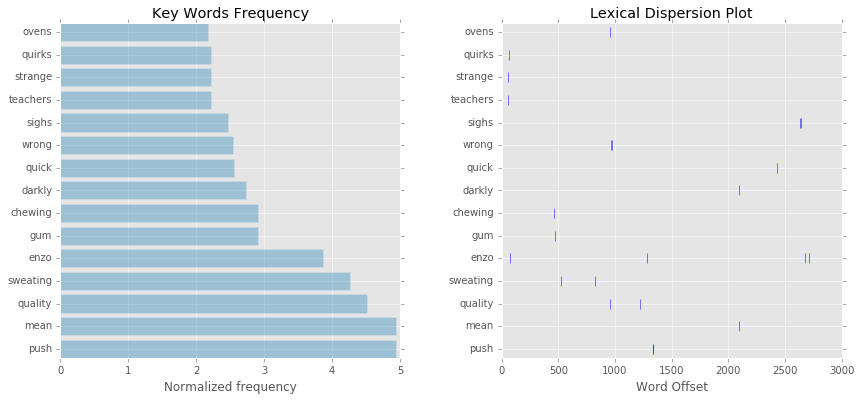

In [15]:
for text in texts:
    print lsa.summarize(text,n=n_sents)
    keywords_ranking = lsa_pattern.word_ranking(text).most_common(15)
    words, scores =  list(zip(*keywords_ranking))
    x, y = lsa_pattern.dispersion(text, words)
    words = [w for w in words]                
    draw(words, scores, x, y)

## Gensim summarizer

In [15]:
from gensim import summarization

Some of Tesla Motor Inc's (TSLA.O) biggest investors have signaled support for CEO Elon Musk's plan to buy solar power company SolarCity Corp (SCTY.O), although the electric car maker's stock cratered on Wednesday, lopping more than the $2.8 billion value of the proposed deal off Tesla's market capitalization.
Some argued the two firms cater to different groups of customers, with little crossover.Shares of the much smaller SolarCity rose more than 3 percent, valuing the U.S. market leader in residential rooftop solar panels at $2.15 billion.PLANS IN THE PIPELINE In a hastily arranged call with investors and Wall Street analysts early on Wednesday, where Tesla executives defended the deal, Musk said institutional shareholders had some idea of the plan.
I also feel like Musk is trying to do too much," said well-known investor Jeffrey Gundlach, chief executive at DoubleLine Capital, which does not hold Tesla shares.Investors who short Tesla, betting that shares will fall, pointed to the c

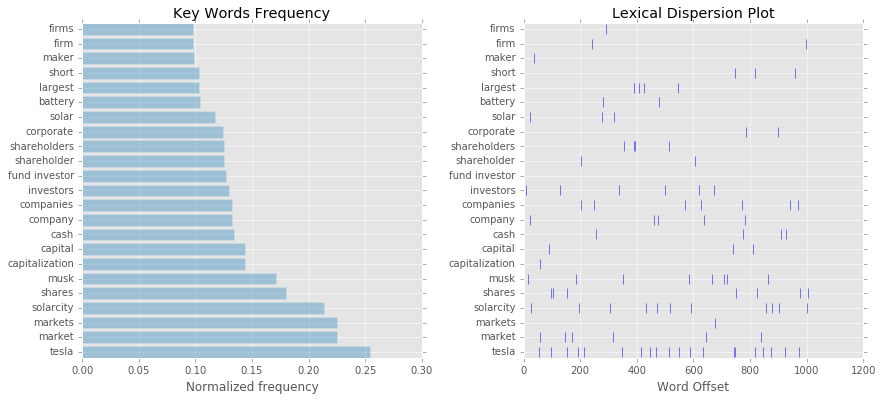

WASHINGTON Republicans in the U.S. House of Representatives unveiled an alternative plan to overhaul the nation's healthcare system on Wednesday, slamming Obamacare even as they aimed to keep some of its more popular provisions.Their proposal, part of broader effort by House Speaker Paul Ryan to offer a Republican agenda ahead of the Nov. 8 elections, is conservatives' latest bid to "repeal and replace" the 2010 law.Ryan, the country's highest-ranking elected Republican, is offering the proposal as the party seeks to maintain control of both the House and the Senate and take over the White House.
In their plan, which is not formal legislation, House Republicans blasted Obamacare for limiting patients' choices, increasing consumer costs, and burying employers and health care providers under new regulations.Ryan's proposal would keep some popular pieces, including not allowing people with pre-existing conditions to be denied coverage and permitting children to stay on their parents' cove

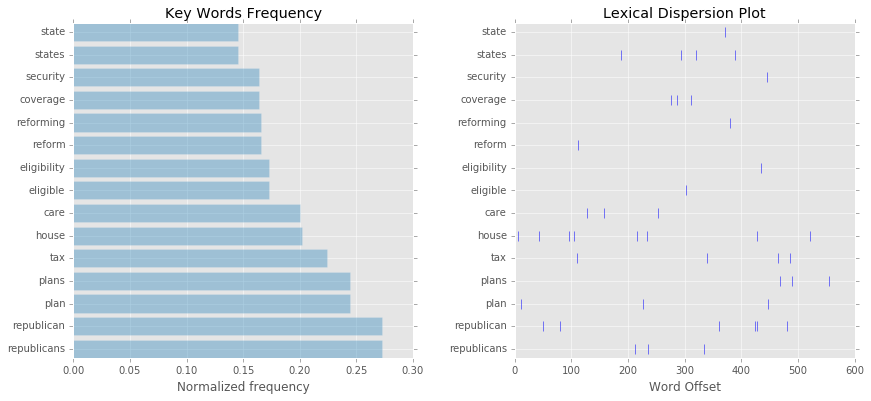

It can be discouraging to make big movies [today].”That may seem a surprising statement from the director of Independence Day: Resurgence, the sequel to the 1996 blockbuster about humanity’s valiant struggle against an alien invasion.
Ordinary sequels are no longer good enough – today movie studios try to build long series of interconnected films, or ‘cinematic universes’, usually involving people with superpowers.Independence Day: Resurgence may appear to be the odd film out in such an environment.


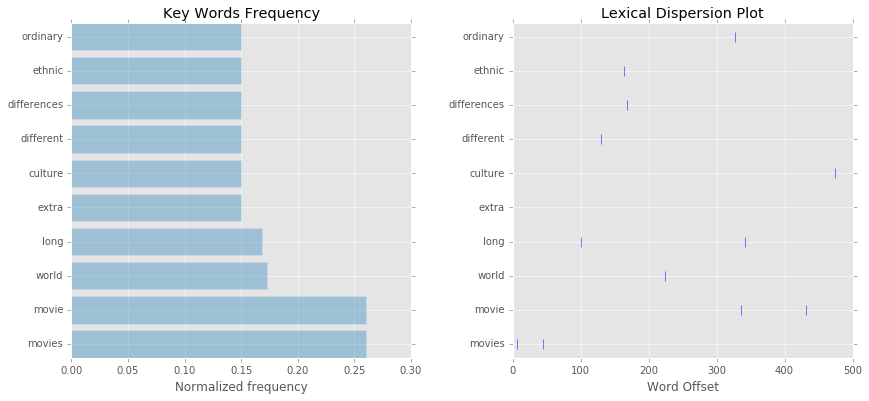

Apparently Federal Reserve Chairwoman Janet Yellen didn’t get the memo but helicopter money is already at work in the U.S. Last week, Yellen conceded that the Fed may have to “legitimately consider” resorting to unconventional measures in the event of a severe economic downturn.
But Torsten Slok, Deutsche Bank’s chief international economist, argues that the Fed has been employing measures similar to helicopter money via its remittances to the Treasury.
Helicopter money in its simplest form calls for a central bank to print money and give it to people, most likely in coordination with fiscal policy like a tax cut or to fund spending.
In other words, sometimes it’s “the communication of helicopter money that determines how effective it is in supporting GDP growth,” Slok said.


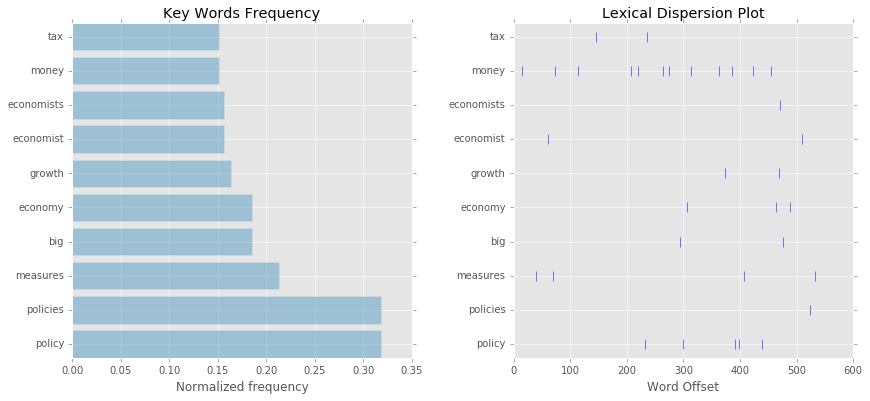

The planet’s top pie-making school in Naples teaches 300 years of Italian technique in 30 days.
This thought occurs to me as Enzo Coccia, who runs a world-renowned pizza academy and two of the finest pizza restaurants in Naples, shouts, “Attack!
His chief lieutenant, Davide Bruno, has the stocky build of a drill sergeant and, during the course of the morning’s instruction, makes a sensitive pizza novice from Honolulu leak quiet tears in front of the wood-burning oven.
There’s also Michele Triunfo, the diminutive 81-year-old master baker who’s worked in pizza joints across this ancient Italian city since he was 12.
“The finest dough, it should be soft, like a baby’s bottom,” Triunfo says.
I’m attempting, after slamming at the dough like a wheezing prizefighter, to master what Coccia likes to call “the delicate dance” of proper Neapolitan pizza making, which includes shaping fresh dough into little panetti balls, as smooth and round as plums.
The normal course of study at Coccia’s Pizza 

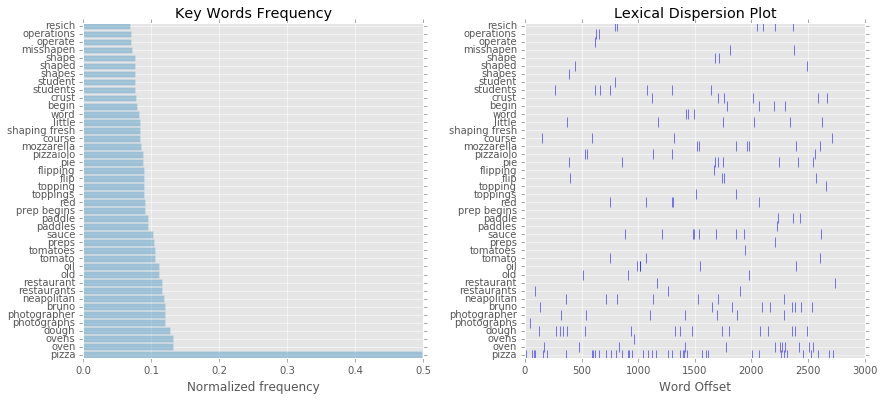

In [17]:
for text in texts:
    print summarization.summarize(text, ratio=0.2)
    words, scores =  list(zip(*summarization.keywords(text, ratio=0.1, scores=True)))
    scores = [i[0] for i in scores]
    x, y = lsa_pattern.dispersion(text, words)
    draw(words, scores, x, y)

## Pyteaser summarizer

In [7]:
import pyteaser

In [8]:
articles = [pyteaser.grab_link(url) for url in urls]

SolarCity shares have fallen more than 50 percent this year in a highly competitive market, fanning criticism that a Tesla deal was meant to save SolarCity. Overall, 45 percent of Tesla shareholders also hold SolarCity stock, a person familiar with the matter said.  Hardly any SolarCity shares were available for borrowing. Some analysts noted that SpaceX has bought SolarCity bonds, giving it and Musk incentive to support SolarCity. That was a blow to Musk, who is chief executive of Tesla, chair of SolarCity and the biggest shareholder in both companies.


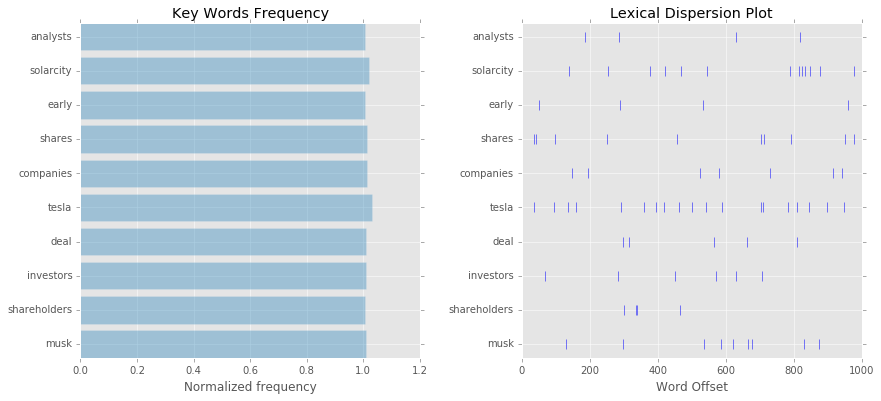

Obama, a Democrat, has said it has helped some 20 million Americans get health care coverage. 

"We stand ready to work with both parties on market-based solutions that improve access and affordability for consumers," said Marilyn Tavenner, president of America’s Health Insurance Plans. House Republican would gradually raise the Medicare eligibility age, now 65, to match that of the Social Security pension plan, which is 67 for people born in 1960 or later. Like Obamacare's so-called Cadillac tax on expensive healthcare plans offered by employers, which goes into effect in 2018, the Republican proposal would cap the tax deductibility of employer-based plans. U.S. Speaker of the House Paul Ryan (R-WI) takes questions at a news conference in Washington, U.S. May 12, 2016.


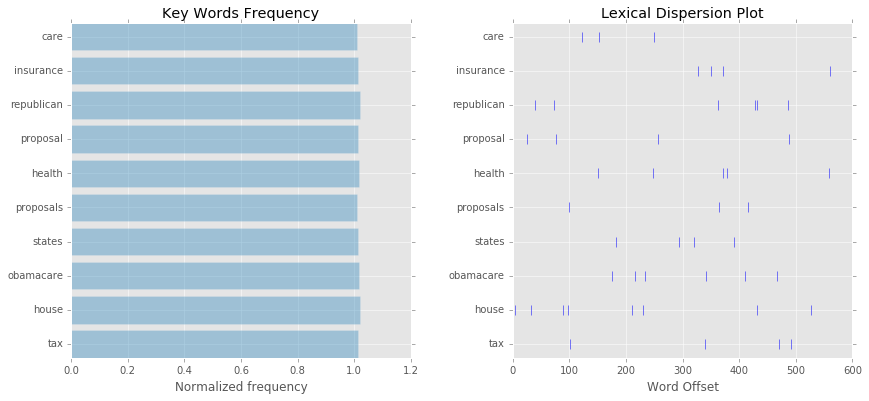

Now, nearly all blockbusters, including Independence Day: Resurgence, are drenched in computer-generated images. But Emmerich and 20th Century Fox did wait 20 years before releasing a sequel – a staggeringly long time in Hollywood, considering that the original film grossed over $800 million (£272 million) worldwide. It can be discouraging to make big movies [today].”

That may seem a surprising statement from the director of Independence Day: Resurgence, the sequel to the 1996 blockbuster about humanity’s valiant struggle against an alien invasion. Independence Day: Resurgence may appear to be the odd film out in such an environment. Blockbuster film-making has changed drastically in the 20 years since the original film, which relied on practical effects and model work for some of its most dazzling moments.


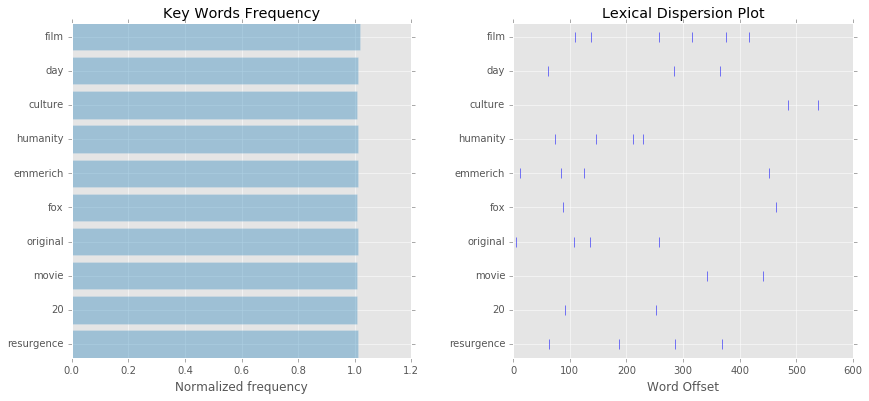

So there are good reasons why policy makers in the U.S., Europe, and Japan are hesitant to do full-blown helicopter money,” Slok said. In other words, sometimes it’s “the communication of helicopter money that determines how effective it is in supporting GDP growth,” Slok said. Today’s version of helicopter money is more quiet. Helicopter money in its simplest form calls for a central bank to print money and give it to people, most likely in coordination with fiscal policy like a tax cut or to fund spending. By law, the Fed is required to remit any excess funds remaining after covering for its expenses to the Treasury Department.


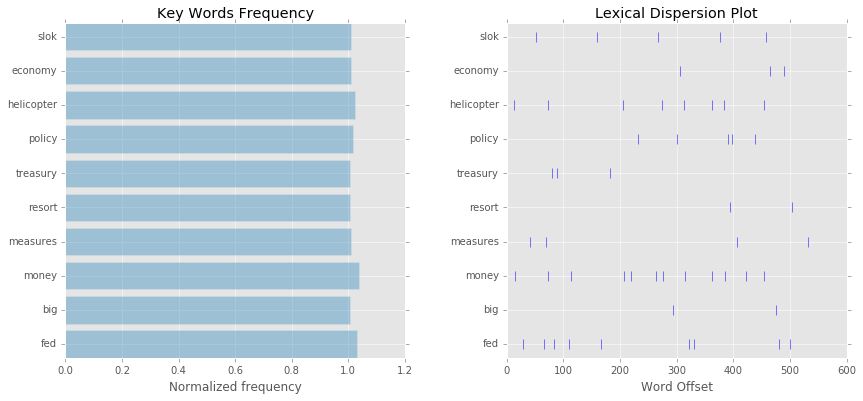

This thought occurs to me as Enzo Coccia, who runs a world-renowned pizza academy and two of the finest pizza restaurants in Naples, shouts, “Attack! I dress one of the misshapen wheels of dough Bruno has discarded and dab it with marinara, olive oil, bits of mozzarella, and a few tears of fresh basil. There’s also Michele Triunfo, the diminutive 81-year-old master baker who’s worked in pizza joints across this ancient Italian city since he was 12.  And what about the crust? “It’s too crunchy,” Enzo says. “We couldn’t serve your pizza here in Naples, but I’m sure we could sell it to your friends back in New York.”

A month-long course at Enzo Coccia’s Pizza Consulting in Naples starts at $3,135, not including travel or lodging. Coccia comes over, and for a moment, we regard my cooling pizza in silence.


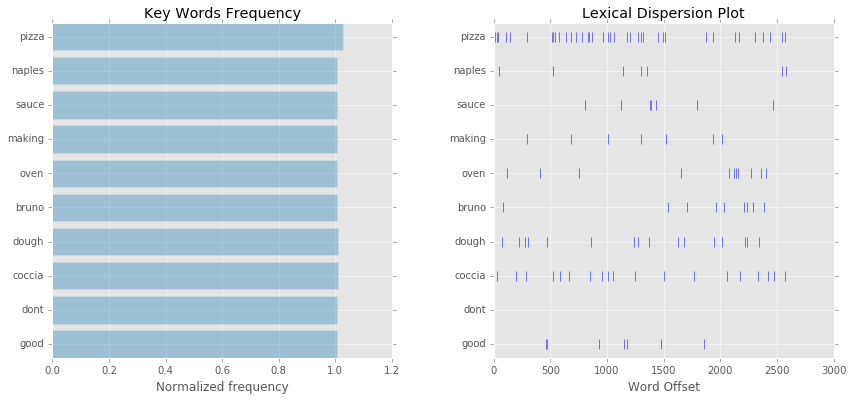

In [12]:
for article in articles:
    sents_list = pyteaser.Summarize(unicode(article.title), unicode(article.cleaned_text))  # summary consist of 5 sents
    print ' '.join(sents_list)
    words = pyteaser.keywords(unicode(article.cleaned_text)).keys()
    scores =  pyteaser.keywords(unicode(article.cleaned_text)).values()
    x, y = lsa_pattern.dispersion(unicode(article.cleaned_text), words) # only 10 keywords
    draw(words, scores, x, y)

## Sumy summarizers

In [18]:
from sumy.parsers.plaintext import PlaintextParser

from sumy.nlp.tokenizers import Tokenizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words

from sumy.summarizers.luhn import LuhnSummarizer
from sumy.summarizers.edmundson import EdmundsonSummarizer
from sumy.summarizers.lsa import LsaSummarizer
from sumy.summarizers.text_rank import TextRankSummarizer
from sumy.summarizers.lex_rank import LexRankSummarizer
from sumy.summarizers.sum_basic import SumBasicSummarizer
from sumy.summarizers.kl import KLSummarizer

In [19]:
LANGUAGE = "english"
stemmer = Stemmer(LANGUAGE)
parsed_texts = [PlaintextParser.from_string(text, Tokenizer(LANGUAGE)) for text in texts]

#### LuhnSummarizer

In [20]:
luhn = LuhnSummarizer(stemmer)
luhn.stop_words = get_stop_words(LANGUAGE)

for parsed_text in parsed_texts:
    print '===================='
    for sentence in luhn(parsed_text.document, n_sents):
        print(sentence)

Some of Tesla Motor Inc's (TSLA.O) biggest investors have signaled support for CEO Elon Musk's plan to buy solar power company SolarCity Corp (SCTY.O), although the electric car maker's stock cratered on Wednesday, lopping more than the $2.8 billion value of the proposed deal off Tesla's market capitalization.
Some argued the two firms cater to different groups of customers, with little crossover.Shares of the much smaller SolarCity rose more than 3 percent, valuing the U.S. market leader in residential rooftop solar panels at $2.15 billion.PLANS IN THE PIPELINE In a hastily arranged call with investors and Wall Street analysts early on Wednesday, where Tesla executives defended the deal, Musk said institutional shareholders had some idea of the plan.
The manager of the second largest mutual fund investor in Tesla, the $12 billion Fidelity OTC Portfolio, which is also the largest institutional holder of SolarCity, praised a tie-up in comments earlier this year.
WASHINGTON Republicans i

#### EdmundsonSummarizer

In [21]:
edmund = EdmundsonSummarizer(stemmer)
edmund.stop_words = get_stop_words(LANGUAGE)

for parsed_text in parsed_texts:
    print '===================='
    for sentence in edmund(parsed_text.document, n_sents):
        print(sentence)

ValueError: Set of bonus words is empty. Please set attribute 'bonus_words' with collection of words.

#### LsaSummarizer

In [22]:
lsa_sumy = LsaSummarizer(stemmer)
lsa_sumy.stop_words = get_stop_words(LANGUAGE)

for parsed_text in parsed_texts:
    print '===================='
    for sentence in lsa_sumy(parsed_text.document, n_sents):
        print(sentence)

Some argued the two firms cater to different groups of customers, with little crossover.Shares of the much smaller SolarCity rose more than 3 percent, valuing the U.S. market leader in residential rooftop solar panels at $2.15 billion.PLANS IN THE PIPELINE In a hastily arranged call with investors and Wall Street analysts early on Wednesday, where Tesla executives defended the deal, Musk said institutional shareholders had some idea of the plan.
Baker and Will Danoff, who runs the $100 billion-plus Fidelity Contrafund (FCNTX.O), the largest mutual fund investor in Tesla with 3.5 percent of stock, have both told Reuters in interviews that they tend to give more leeway to founder-run companies which they believe are still in the early stages of growth.
(Additional reporting by Jennifer Ablan, Supantha Mukherjee, Narottam Medhora,Liana Baker, Paul Lienert, Michael Flaherty, Alexandria Sage, Tim McLaughlin, Ross Kerber, Rishika Sadam, Nichola Groom and Noel Randewich; Writing by Peter Hend

#### TextRankSummarizer

In [23]:
textrank_sumy = TextRankSummarizer(stemmer)
textrank_sumy.stop_words = get_stop_words(LANGUAGE)

for parsed_text in parsed_texts:
    print '===================='
    for sentence in textrank_sumy(parsed_text.document, n_sents):
        print(sentence)

Some of Tesla Motor Inc's (TSLA.O) biggest investors have signaled support for CEO Elon Musk's plan to buy solar power company SolarCity Corp (SCTY.O), although the electric car maker's stock cratered on Wednesday, lopping more than the $2.8 billion value of the proposed deal off Tesla's market capitalization.
Musk, a founder of Tesla and SolarCity who owns about a fifth of each, will recuse himself from board and shareholder votes, leaving the fate of the deal in the hands of outside investors, led by major fund companies such as Fidelity Investments.Musk himself said that Tesla could be a trillion-dollar company one day, despite its current market value being less than 3 percent of that figure.
"When a company's executives misunderstand modern corporate finance and technology strategy, they can make profound miscalculations and errors of judgment," Salome Gvaramia, chief operating officer of Devonshire Capital, which has a short position in Tesla, said in a statement.SolarCity shares

#### LexRankSummarizer

In [24]:
lexrank = LexRankSummarizer(stemmer)
lexrank.stop_words = get_stop_words(LANGUAGE)

for parsed_text in parsed_texts:
    print '===================='
    for sentence in lexrank(parsed_text.document, n_sents):
        print(sentence)

Some of Tesla Motor Inc's (TSLA.O) biggest investors have signaled support for CEO Elon Musk's plan to buy solar power company SolarCity Corp (SCTY.O), although the electric car maker's stock cratered on Wednesday, lopping more than the $2.8 billion value of the proposed deal off Tesla's market capitalization.
Some argued the two firms cater to different groups of customers, with little crossover.Shares of the much smaller SolarCity rose more than 3 percent, valuing the U.S. market leader in residential rooftop solar panels at $2.15 billion.PLANS IN THE PIPELINE In a hastily arranged call with investors and Wall Street analysts early on Wednesday, where Tesla executives defended the deal, Musk said institutional shareholders had some idea of the plan.
Baker and Will Danoff, who runs the $100 billion-plus Fidelity Contrafund (FCNTX.O), the largest mutual fund investor in Tesla with 3.5 percent of stock, have both told Reuters in interviews that they tend to give more leeway to founder-r

#### SumBasicSummarizer

In [25]:
basic = SumBasicSummarizer(stemmer)
basic.stop_words = get_stop_words(LANGUAGE)

for parsed_text in parsed_texts:
    print '===================='
    for sentence in basic(parsed_text.document, n_sents):
        print(sentence)

It owns 2.1 percent of shares.Overall, 45 percent of Tesla shareholders also hold SolarCity stock, a person familiar with the matter said.
"This deal feels like (Musk) has lost his Midas touch.
Hardly any SolarCity shares were available for borrowing.
WASHINGTON Republicans in the U.S. House of Representatives unveiled an alternative plan to overhaul the nation's healthcare system on Wednesday, slamming Obamacare even as they aimed to keep some of its more popular provisions.Their proposal, part of broader effort by House Speaker Paul Ryan to offer a Republican agenda ahead of the Nov. 8 elections, is conservatives' latest bid to "repeal and replace" the 2010 law.Ryan, the country's highest-ranking elected Republican, is offering the proposal as the party seeks to maintain control of both the House and the Senate and take over the White House.
"We're not going to repeal Obamacare when the current president of the United States is a guy named Obama," he told reporters.
For people withou

#### KLSummarizer

In [26]:
kl = KLSummarizer(stemmer)
kl.stop_words = get_stop_words(LANGUAGE)

for parsed_text in parsed_texts:
    print '===================='
    for sentence in kl(parsed_text.document, n_sents):
        print(sentence)

Some of Tesla Motor Inc's (TSLA.O) biggest investors have signaled support for CEO Elon Musk's plan to buy solar power company SolarCity Corp (SCTY.O), although the electric car maker's stock cratered on Wednesday, lopping more than the $2.8 billion value of the proposed deal off Tesla's market capitalization.
It is still early in the process, he said, but "We expect it to go through and believe that most investors who actually own the stock understand management's long-term vision for the company.
(Additional reporting by Jennifer Ablan, Supantha Mukherjee, Narottam Medhora,Liana Baker, Paul Lienert, Michael Flaherty, Alexandria Sage, Tim McLaughlin, Ross Kerber, Rishika Sadam, Nichola Groom and Noel Randewich; Writing by Peter Henderson; Editing by Anil D'Silva, Lisa Von Ahn and Bill Rigby)
Obama, a Democrat, has said it has helped some 20 million Americans get health care coverage.Ryan acknowledged his agenda was unlikely to displace current law anytime soon.
“What we are laying out

## Comparison gensim summary with sumy summaries

In [27]:
from sumy.evaluation.__main__ import  evaluate_cosine_similarity, evaluate_unit_overlap

In [28]:
# lets assume gensim summary as ideal one
# so collect gensim`s summaries into array

reference = []
for text in texts:
    reference.append(PlaintextParser.from_string(summarization.summarize(text, ratio=0.2), Tokenizer(LANGUAGE)))

In [30]:
import numpy as np
# compute two ranking: cosine and unit overlap 
# ranking = array(n_models x n_texts)-shape

models = [luhn, lsa_sumy, textrank_sumy, lexrank, basic, kl]
n_models = len(models)
n_texts = len(parsed_texts)
ranking_cos = np.empty((n_models, n_texts))
ranking_ol = np.empty((n_models, n_texts))

In [31]:
for i in range(len(models)):
    for j in range(len(parsed_texts)):
        evaluation = models[i](parsed_texts[j].document, n_sents)
        ranking_cos[i,j] = evaluate_cosine_similarity(evaluation, reference[j].document.sentences)
        ranking_ol[i,j] = evaluate_unit_overlap(evaluation, reference[j].document.sentences)

In [32]:
print 'mean cosine-score per model:\n', np.mean(ranking_cos, axis=1)
print '\n mean unit_overlap-score per model:\n', np.mean(ranking_ol, axis=1)

mean cosine-score per model:
[ 0.83139945  0.64923379  0.6850154   0.69483693  0.49186587  0.66835685]

 mean unit_overlap-score per model:
[ 0.5013317   0.24274191  0.49911209  0.33834632  0.18486177  0.28057983]


## Comparison gensim with pyteaser

In [16]:
evaluation2 = []

for article in articles:
    sents_list = pyteaser.Summarize(unicode(article.title), unicode(article.cleaned_text))
    evaluation2.append(' '.join(sents_list))
    
reference2 = []
for article in articles:
    reference2.append(summarization.summarize(article.cleaned_text, ratio=0.2))


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import pairwise_distances

In [23]:
if len(evaluation2) == len(reference2):
    cos_scores = []
    vectorizer = TfidfVectorizer(stop_words='english')
    
    for i in range(len(evaluation2)):
        matrix = vectorizer.fit_transform([evaluation2[i], reference2[i]])
        cos = pairwise_distances(matrix, metric='cosine')
        cos_scores.append(cos[0,1])
    
print np.mean(cos_scores)

0.60845829957585384

## Manual summarization

In [33]:
from nltk.tokenize import sent_tokenize

In [34]:
tfidf_matrices = []
feats_idfs = []
for text in texts:
    tfidf = TfidfVectorizer(stop_words='english')
    matrix = tfidf.fit_transform(sent_tokenize(text))
    tfidf_matrices.append(matrix)
    feats = tfidf.get_feature_names()
    idfs = tfidf.idf_
    feats_idfs.append(zip(feats, idfs))

In [35]:
import networkx as nx
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [36]:
G = nx.algorithms.bipartite.matrix.from_biadjacency_matrix(tfidf_matrices[0], edge_attribute='weight')

In [37]:
nx.get_edge_attributes(G, 'weight')

{(0, 59): 0.18675580120500734,
 (0, 60): 0.14626779233128737,
 (0, 71): 0.18675580120500734,
 (0, 73): 0.21043976812499893,
 (0, 74): 0.18675580120500734,
 (0, 77): 0.18675580120500734,
 (0, 85): 0.13726356600276918,
 (0, 91): 0.21043976812499893,
 (0, 94): 0.21043976812499893,
 (0, 102): 0.13726356600276918,
 (0, 120): 0.18675580120500734,
 (0, 121): 0.21043976812499893,
 (0, 184): 0.12946375037755897,
 (0, 207): 0.21043976812499893,
 (0, 212): 0.18675580120500734,
 (0, 215): 0.13726356600276918,
 (0, 234): 0.21043976812499893,
 (0, 236): 0.11642952281505968,
 (0, 262): 0.18675580120500734,
 (0, 271): 0.21043976812499893,
 (0, 276): 0.18675580120500734,
 (0, 308): 0.21043976812499893,
 (0, 321): 0.21043976812499893,
 (0, 326): 0.16995175925127895,
 (0, 327): 0.11086227892530455,
 (0, 334): 0.14626779233128737,
 (0, 343): 0.15691753168877967,
 (0, 350): 0.17086909042234896,
 (0, 359): 0.21043976812499893,
 (0, 362): 0.16995175925127895,
 (0, 370): 0.15691753168877967,
 (1, 26): 0.23512

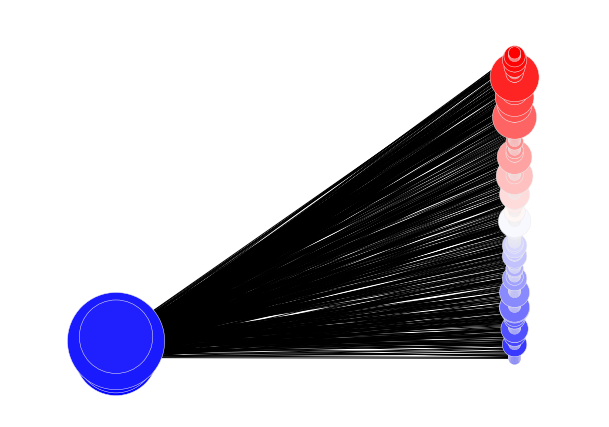

In [38]:
B = G
deg = nx.degree(B)

plt.figure(figsize=(10,7))
plt.axis('off')

nodesize = [v * 150 for v in deg.values()]

X, Y = nx.algorithms.bipartite.sets(B)

pos = dict()
pos.update( (n, (1, i)) for i, n in enumerate(X) ) # put nodes from X at x=1
pos.update( (n, (2, i)) for i, n in enumerate(Y) ) # put nodes from Y at x=2

nx.draw(B, nodelist=deg.keys(), pos=pos, node_color=range(len(B)), node_size=nodesize, cmap=plt.cm.bwr)

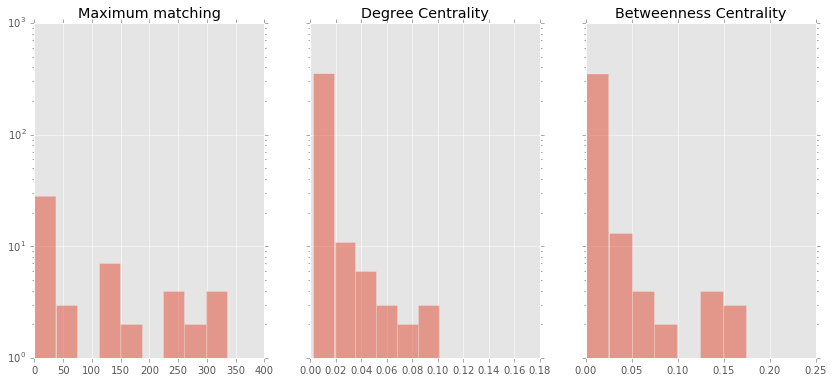

In [39]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(14,6))

ax1.hist(nx.bipartite.maximum_matching(B).values(), log=True, alpha=0.5)
ax1.set_title('Maximum matching')
ax2.hist(nx.degree_centrality(B).values(), log=True, alpha=0.5)
ax2.set_title('Degree Centrality')
ax3.hist(nx.betweenness_centrality(B).values(), log=True, alpha=0.5)
ax3.set_title('Betweenness Centrality')

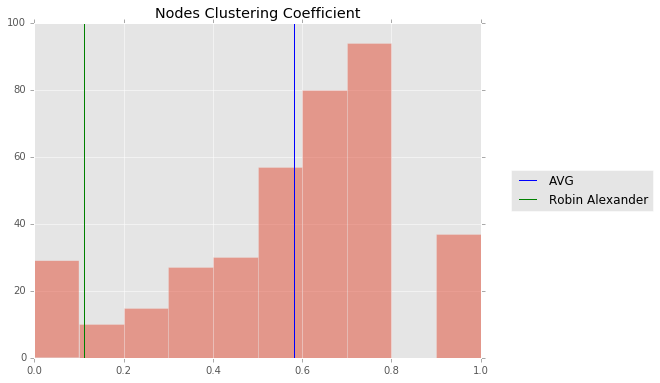

In [40]:
plt.figure(figsize=(8,6))
plt.hist(nx.bipartite.clustering(B).values(), alpha=0.5)
plt.title('Nodes Clustering Coefficient')
plt.axvline(nx.bipartite.average_clustering(B), label='AVG')
plt.axvline(nx.bipartite.robins_alexander_clustering(B), label='Robin Alexander', color='green')
plt.legend(loc='center right',bbox_to_anchor=(1.4, 0.5))

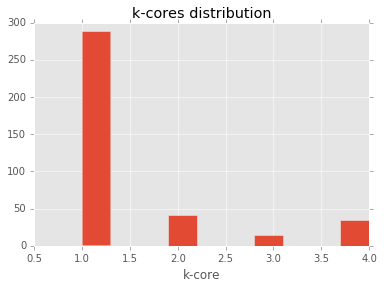

In [41]:
plt.hist(nx.core_number(B).values())
plt.title('k-cores distribution')
plt.xlabel('k-core')

In [44]:
from collections import Counter
idxs = set.intersection(
    set(dict(Counter(nx.degree_centrality(B)).most_common(15))), 
    set(dict(Counter(nx.k_core(B, k=4).degree()).most_common(15))),
    set(dict(Counter(nx.bipartite.maximum_matching(B)).most_common(15)))
)  

In [46]:
for i in idxs:
    print sent_tokenize(texts[0])[i]



Some of Tesla Motor Inc's (TSLA.O) biggest investors have signaled support for CEO Elon Musk's plan to buy solar power company SolarCity Corp (SCTY.O), although the electric car maker's stock cratered on Wednesday, lopping more than the $2.8 billion value of the proposed deal off Tesla's market capitalization.
We foresee fruitful synergies between say, Tesla and SolarCity – or any company that can benefit from superior battery technology," Gavin Baker, who runs the Fidelity OTC fund, said in his first-quarter commentary for investors.
Baker and Will Danoff, who runs the $100 billion-plus Fidelity Contrafund (FCNTX.O), the largest mutual fund investor in Tesla with 3.5 percent of stock, have both told Reuters in interviews that they tend to give more leeway to founder-run companies which they believe are still in the early stages of growth.
Musk, a founder of Tesla and SolarCity who owns about a fifth of each, will recuse himself from board and shareholder votes, leaving the fate of t